# Climate change CO2 levels 


## Import libraries
* pandas
* matplotlib
* seaborn

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Create dataframes from csv files
* Global Land Temperatures by Country
* Global temperature data
* CO2 Level

#### Global Land Temperatures by Country

In [140]:
df = pd.read_csv("./data/GlobalLandTemperaturesByCountry.csv")

In [141]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [142]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


##### Dataframe by country
* Venezuela
* Colombia
* Panama


In [143]:
countries = "Venezuela,Colombia,Panama".split(',')
data = {country:df[df["Country"] == country].copy() for country in countries}

for country in countries:
    data[country]["dt"] = pd.to_datetime(data[country]["dt"])


##### Global temperature data


In [144]:
data_global = pd.read_csv("./data/GlobalTemperatures.csv")
data_global["dt"] = pd.to_datetime(data_global["dt"])

##### CO2 Level

In [145]:
co2_ppm = pd.read_json("./data/co2-mm-mlo_json.json")
co2_ppm.head()

,Average,Date,Decimal Date,Interpolated,Number of Days,Trend
0,315.71,1958-03-01,1958.208,315.71,-1,314.62
1,317.45,1958-04-01,1958.292,317.45,-1,315.29
2,317.50,1958-05-01,1958.375,317.50,-1,314.71
3,-99.99,1958-06-01,1958.458,317.10,-1,314.85
4,315.86,1958-07-01,1958.542,315.86,-1,314.98


In [146]:
co2_ppm.set_index('Date',inplace=True)
co2_ppm

,Average,Decimal Date,Interpolated,Number of Days,Trend
Date,,,,,
1958-03-01,315.71,1958.208,315.71,-1,314.62
1958-04-01,317.45,1958.292,317.45,-1,315.29
1958-05-01,317.50,1958.375,317.50,-1,314.71
1958-06-01,-99.99,1958.458,317.10,-1,314.85
1958-07-01,315.86,1958.542,315.86,-1,314.98
...,...,...,...,...,...
2018-05-01,411.24,2018.375,411.24,24,407.91
2018-06-01,410.79,2018.458,410.79,29,408.49
2018-07-01,408.71,2018.542,408.71,27,408.32


### Describe data for countries

In [147]:
for country in countries:
    print(country)
    print(data[country].describe().T)
    print("\n")



Venezuela
                                count       mean       std     min       25%  \
AverageTemperature             2086.0  25.025686  0.703189  22.777  24.52325   
AverageTemperatureUncertainty  2086.0   0.586000  0.398460   0.084   0.31000   

                                   50%       75%     max  
AverageTemperature             24.9825  25.49525  27.807  
AverageTemperatureUncertainty   0.4540   0.76000   4.120  


Colombia
                                count       mean       std     min     25%  \
AverageTemperature             2077.0  24.716871  0.629906  22.918  24.279   
AverageTemperatureUncertainty  2077.0   0.581472  0.397597   0.076   0.268   

                                  50%     75%     max  
AverageTemperature             24.692  25.114  27.205  
AverageTemperatureUncertainty   0.433   0.840   3.363  


Panama
                                count       mean       std     min      25%  \
AverageTemperature             2006.0  26.291621  0.765062  24.078  25

##### Correlation for country

In [148]:
for country in countries:
    print(country)
    print(data[country].corr())
    print("\n")



Venezuela
                               AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.319882   

                               AverageTemperatureUncertainty  
AverageTemperature                                 -0.319882  
AverageTemperatureUncertainty                       1.000000  


Colombia
                               AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.399613   

                               AverageTemperatureUncertainty  
AverageTemperature                                 -0.399613  
AverageTemperatureUncertainty                       1.000000  


Panama
                               AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.271862   

                               AverageTemperatureUncertainty  
AverageTemperature                               

There is no correlation between Average Temperature and Average Temperature Uncertainty for countries Venezuela, Colombia and Panama

#### Annual increase in global average temperature

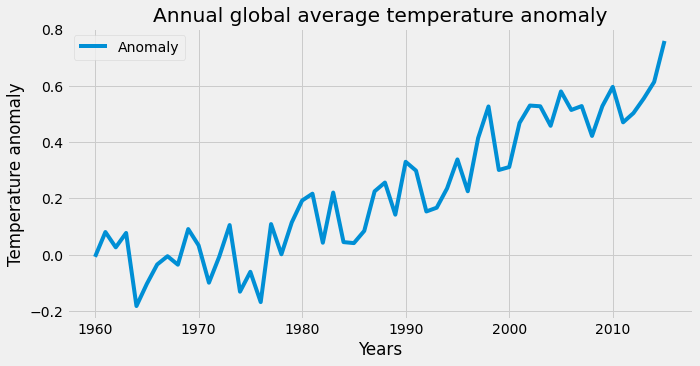

In [149]:
annual_mean_global = data_global.groupby(data_global["dt"].dt.year).mean()
reference_temperature_global = annual_mean_global.loc[1951:1980].mean()["LandAndOceanAverageTemperature"]
annual_mean_global["Anomaly"] = annual_mean_global["LandAndOceanAverageTemperature"] - reference_temperature_global

plt.figure()
plt.style.use("fivethirtyeight")
annual_mean_global.loc[1960:2015]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Annual global average temperature anomaly")
plt.xlabel('Years')
plt.ylabel('Temperature anomaly')
plt.show()

In [150]:
def graph_annual_temperature(country):
    annual_mean_by_country = data[country].groupby(data[country]["dt"].dt.year).mean()
    reference_temperature_by_country = annual_mean_by_country.loc[1951:1980].mean()["AverageTemperature"]
    annual_mean_by_country["Anomaly"] = annual_mean_by_country["AverageTemperature"] - reference_temperature_by_country

    plt.style.use("fivethirtyeight")
    annual_mean_by_country.loc[1960:2012]["Anomaly"].plot(figsize = (10,5), grid=True, legend=True)
    plt.title(f"Average annual temperature variation in {country}")
    plt.xlabel('Years')
    plt.ylabel('temperature increase')
    plt.show()

#### Annual average temperature anomaly for country

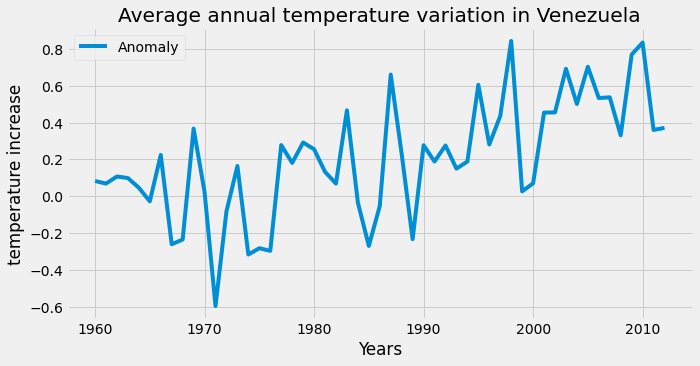

In [151]:
graph_annual_temperature("Venezuela")

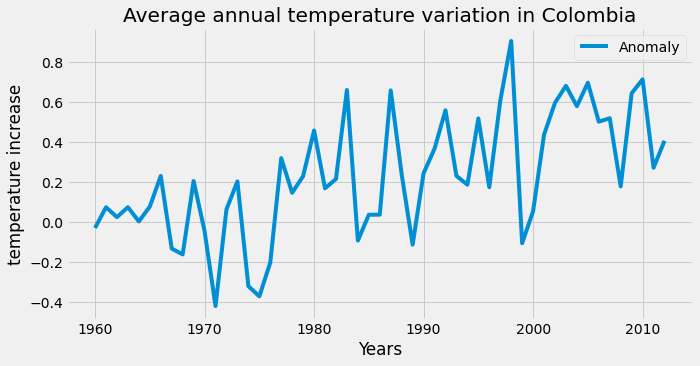

In [152]:
graph_annual_temperature("Colombia")

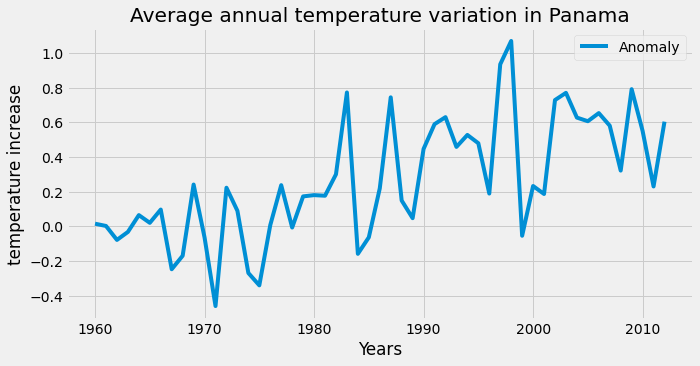

In [153]:
graph_annual_temperature("Panama")

Three countries show increase average annual temperature variation

### Annual levels of CO2 in the atmosphere

In [154]:
co2_ppm

,Average,Decimal Date,Interpolated,Number of Days,Trend
Date,,,,,
1958-03-01,315.71,1958.208,315.71,-1,314.62
1958-04-01,317.45,1958.292,317.45,-1,315.29
1958-05-01,317.50,1958.375,317.50,-1,314.71
1958-06-01,-99.99,1958.458,317.10,-1,314.85
1958-07-01,315.86,1958.542,315.86,-1,314.98
...,...,...,...,...,...
2018-05-01,411.24,2018.375,411.24,24,407.91
2018-06-01,410.79,2018.458,410.79,29,408.49
2018-07-01,408.71,2018.542,408.71,27,408.32


Resample CO2 ppm yearly

In [155]:
annual_co2_ppm = co2_ppm.resample('A').mean()
annual_co2_ppm

,Average,Decimal Date,Interpolated,Number of Days,Trend
Date,,,,,
1958-12-31,232.267000,1958.5833,315.241000,-1.000000,315.283000
1959-12-31,315.974167,1959.5000,315.974167,-1.000000,315.974167
1960-12-31,316.907500,1960.5000,316.907500,-1.000000,316.907500
1961-12-31,317.637500,1961.5000,317.637500,-1.000000,317.636667
1962-12-31,318.450833,1962.5000,318.450833,-1.000000,318.450000
...,...,...,...,...,...
2014-12-31,398.647500,2014.5000,398.647500,25.500000,398.648333
2015-12-31,400.834167,2015.5000,400.834167,27.250000,400.835000
2016-12-31,404.239167,2016.5000,404.239167,26.750000,404.239167


We need remove month and day in index to manage same index between temperature and CO2 ppm

In [156]:
annual_co2_ppm.index =  annual_co2_ppm.index.year

In [157]:
annual_co2_ppm

,Average,Decimal Date,Interpolated,Number of Days,Trend
Date,,,,,
1958,232.267000,1958.5833,315.241000,-1.000000,315.283000
1959,315.974167,1959.5000,315.974167,-1.000000,315.974167
1960,316.907500,1960.5000,316.907500,-1.000000,316.907500
1961,317.637500,1961.5000,317.637500,-1.000000,317.636667
1962,318.450833,1962.5000,318.450833,-1.000000,318.450000
...,...,...,...,...,...
2014,398.647500,2014.5000,398.647500,25.500000,398.648333
2015,400.834167,2015.5000,400.834167,27.250000,400.835000
2016,404.239167,2016.5000,404.239167,26.750000,404.239167


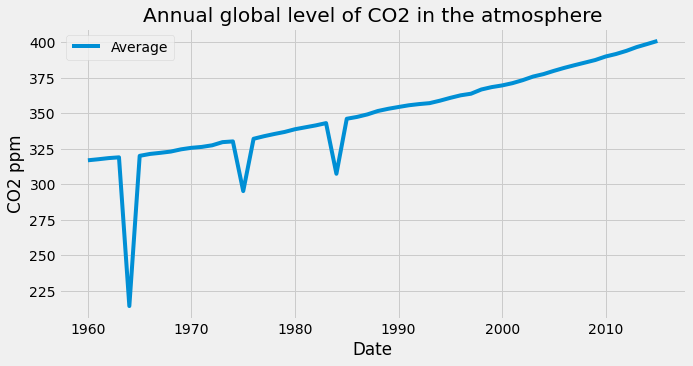

In [158]:
plt.figure()
plt.style.use("fivethirtyeight")
annual_co2_ppm.loc[1960:2015]["Average"].plot(figsize = (10,5), grid=True, legend=True)
plt.title("Annual global level of CO2 in the atmosphere")
plt.ylabel("CO2 ppm")
plt.show()


CO2 increase every year

##### The relationship between CO2 and temperature 

In [159]:
annual_co2_temp = pd.merge(annual_mean_global.loc[1960:2015], annual_co2_ppm.loc[1960:2015], left_index=True, right_index=True)
annual_co2_temp = annual_co2_temp[["LandAndOceanAverageTemperature","Anomaly", "Average"]].copy()
annual_co2_temp.corr()

,LandAndOceanAverageTemperature,Anomaly,Average
LandAndOceanAverageTemperature,1.00000,1.00000,0.86455
Anomaly,1.00000,1.00000,0.86455
Average,0.86455,0.86455,1.00000


Land and Ocean average temperature and anomaly are directly relationship. CO2 has positive relationship between Anomaly or Land and Ocean Average temperature

<AxesSubplot:>

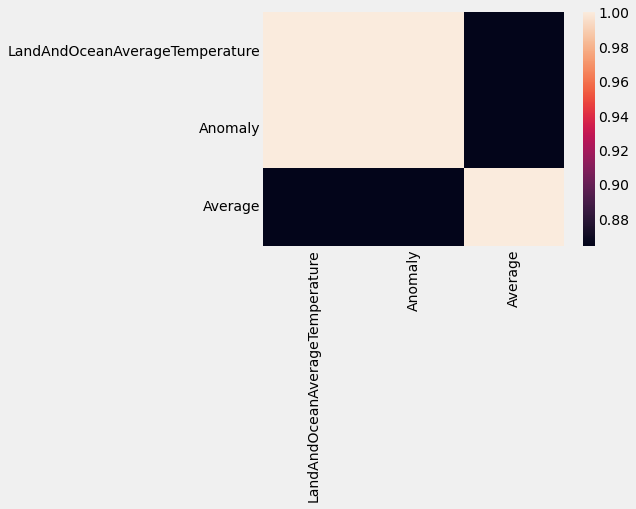

In [160]:
sns.heatmap(annual_co2_temp.corr())


<AxesSubplot:xlabel='Anomaly', ylabel='Average'>

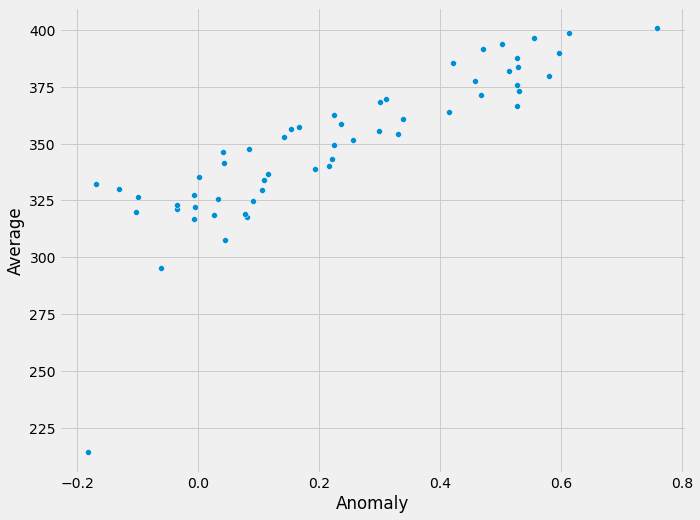

In [161]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Anomaly",y="Average", data=annual_co2_temp)